## Predicting House Prices with Linear Regression

**Problem Statement :** In this project,the goal was to predict housing prices using a **Linear Regression** model.The dataset encompassed various features such as area,number of bedrooms,location and more

In [1]:
# Importing Libraries:
# Import pandas library for data manupulation or analysis
import pandas as pd

# Import Numpy library for numeric calculation
import numpy as np

# Import the libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Inorder to Supress the Warnings Import Filterwarnings:
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
# Import the dataset
df = pd.read_csv('Housing.csv')
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**Interpretation :** Represent the dataset with rows and columns to proceed for further process. 

In [3]:
# display head of the dataset:
# head() displays the first five rows:

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# display tail of the dataset:
# tail() displays the last five rows:

df.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
# Size of the dataset:
df.shape

(545, 13)

**Interpretation :** Shape of the dataset includes how many rows and how many columns are exist in our dataset.The given dataset contains 545 rows and 13 columns

In [6]:
# check the variable type:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

**Interpretation :** Shows different types of datatypes i.e., price,area,bedrooms,bathrooms,stories,parking columns have int type and mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus columns have object type in our dataset.

In [7]:
# Check for the count of columns 
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

**Interpretation :** Represents all column names present in our dataset

In [8]:
# Information about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Interpretation :** From the dataset we can tell that all columns having non-null values

In [9]:
# check for duplicates:
df.duplicated().sum()

0

**Interpretation :** The dataset have no duplicated values

In [10]:
# Check for null values:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**Interpretation :** The dataset has no null values

In [11]:
# check for all the null values in the dataset:
df.isnull().sum().sum()

0

### Descriptive Statistics

In [12]:
# Descriptive Statistics:

# Summary of numerical variables
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Interpretation :** Represents the five point summary about the dataset which includes mean,min,max,standard deviation and count for numerical columns

In [13]:
# for categorical columns:
df.describe(include = 'object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


**Interpretation :** Describe about categorical columns which includes count,unique,top,freq values of the variables

In [14]:
# Skewness for the entire dataset:
df.skew()

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

**Interpretation** : All columns in the given dataset are positively Skewed.

In [15]:
# Kurtosis for the entire dataset:
df.kurt()

price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64

**Interpretation** : The variables in the dataset having positive values, hence we conclude that it is a **Leptokurtic**

### Covariance

1.Covariance is a measure of how much two random variables vary together.
2.Covariance is smaller to variance, but variance tells how a single variable varies, and covariance explain how two variables vary together
3.It cannot tell whether the value indicates a strong relationship, since the covariance can take any value

In [16]:
# Covariance

cov = df.cov()
cov

,price,area,bedrooms,bathrooms,stories,parking
price,3.498544e+12,2.175676e+09,505946.425931,486409.333378,682644.632825,619467.324204
area,2.175676e+09,4.709512e+06,243.232140,211.346617,158.129368,659.989696
bedrooms,5.059464e+05,2.432321e+02,0.544738,0.138674,0.261589,0.088562
bathrooms,4.864093e+05,2.113466e+02,0.138674,0.252476,0.142171,0.076842
stories,6.826446e+05,1.581294e+02,0.261589,0.142171,0.752543,0.034043
parking,6.194673e+05,6.599897e+02,0.088562,0.076842,0.034043,0.742330


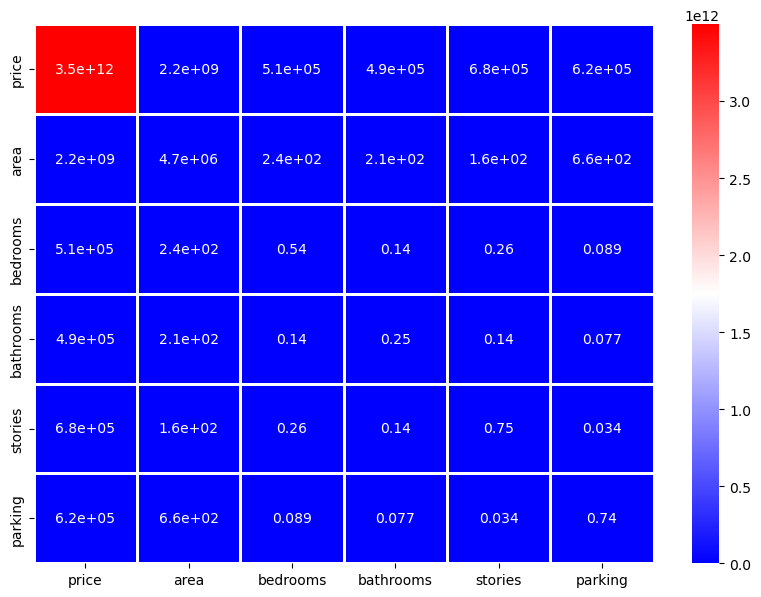

In [17]:
# covariance:
cov = df.cov()
cov

# set the plot size:
fig,ax = plt.subplots(figsize = (10,7))

# plot a Heatmap for the Covariance Matrix
# annot: print values in each cell
# Linewidths : specify width of the Line and specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# Cmap: colour code for the plot
# fmt: set the decimal place of the Annot
sns.heatmap(cov,annot = True,linewidths = 0.95,
           cmap = 'bwr', fmt = '.2g')

# display the plot
plt.show()

**Interpretation :** The plot shows that the variables having relationship between different variables

### Correlation

Correlation is the extent of linear relationship among numeric variables, it ranges between -1 and 1

In [18]:
# Correlation
corr = df.corr()
corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


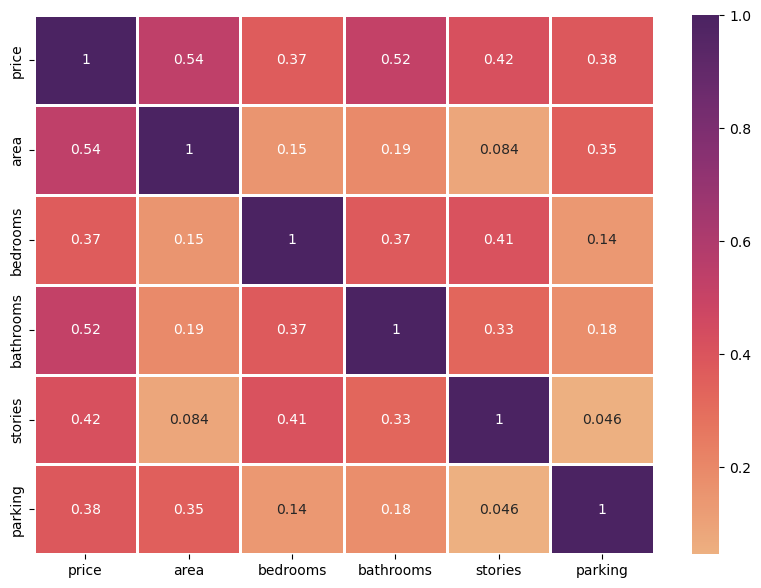

In [20]:
# Correlation
corr = df.corr()
corr

# set the plot size:
fig,ax = plt.subplots(figsize = (10,7))

# plot a Heatmap for the Correlation Matrix
# annot: print values in each cell
# Linewidths : specify width of the Line and specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# Cmap: colour code for the plot
# fmt: set the decimal place of the Annot
sns.heatmap(corr,annot = True,linewidths = 0.95,
           cmap = 'flare', fmt = '.2g')

# display the plot
plt.show()

**Interpretation :** Price column having positive correlation with area,number of bathrooms and stories

### Univariate Analysis

In [21]:
# Considering the variable 'price'
# check the number of observations in the data using the len()

Price = df['price']
print(len(Price))

545


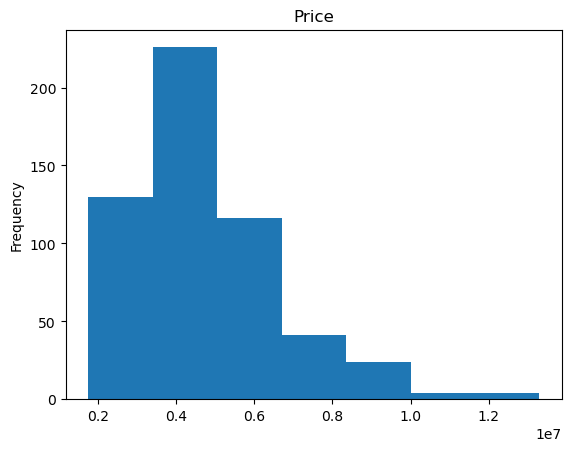

In [22]:
# Bins = 7, creates 7 class intervals
plt.hist(Price,bins = 7)

# set the title:
plt.title('Price')

# set label for y-axis:
plt.ylabel('Frequency')

# display the plot:
plt.show()

**Interpretation :** The histogram divides the data into bins,counts the data points in each bin.It shows the bins on the x-axis and the counts on the y-axis
- The variable "Price" has non symmetrical distribution

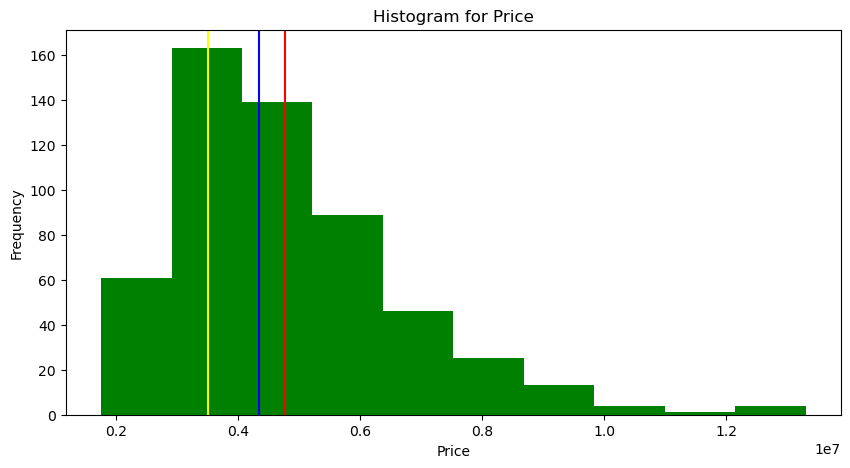

In [23]:
# set the figure size:
plt.figure(figsize = (10,5))

# bins -10, creates the class interval:
plt.hist(df['price'], bins =10,color = 'g')

# plot the lines of the mean,median, and mode on the histogram plot:
# specify different colors for each line along by using the 'color' parameter


plt.axvline(df['price'].mean(), color = 'red')
plt.axvline(df['price'].median(), color = 'blue')
plt.axvline(df['price'].mode()[0], color = 'yellow')

# set the title:
plt.title('Histogram for Price')

# set the labels for x-axis:
plt.xlabel('Price')

# set the labels for y-axis:
plt.ylabel('Frequency')

# display the plot:
plt.show()



In [24]:
# calculating mean,median and mode for price column:

Mean = df['price'].mean()
Median = df['price'].median()
Mode = df['price'].mode()[0]

print('Mean:',round(Mean,2),'\n'
      'Median:',Median,'\n'
      'Mode:',Mode)


Mean: 4766729.25 
Median: 4340000.0 
Mode: 3500000


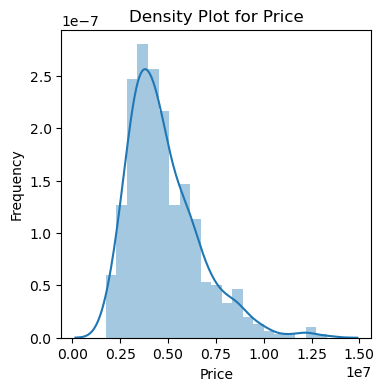

In [25]:
# set the figure size:
plt.rcParams['figure.figsize']=[4,4]

# Distplot() -- a plot for kernel density estimator:
sns.distplot(df['price'])

# set the title:
plt.title('Density Plot for Price')

# Display the labels:
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()


**Interpretation :** The dist plot is near to normal distribution

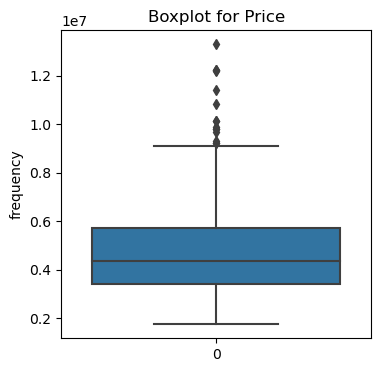

In [26]:
# Box plot:
sns.boxplot(df['price'])

# display labels:
plt.ylabel('frequency')
plt.title('Boxplot for Price')

# display the plot:
plt.show()


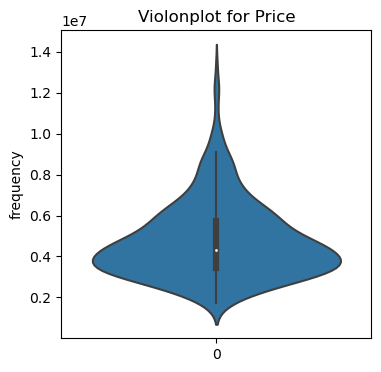

In [27]:
# Violin plot:
sns.violinplot(df['price'])

# display labels:
plt.ylabel('frequency')
plt.title('Violonplot for Price')

# display the plot:
plt.show()


## Bivariate Analysis

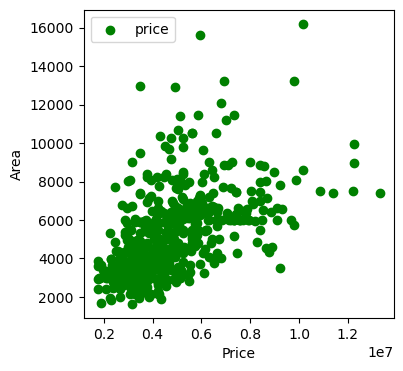

In [28]:
# Scatter plot:
plt.scatter(x='price',y='area',label='price',color='g',data=df)

# display the labels
plt.xlabel('Price')
plt.ylabel('Area')

# display the headings:
plt.legend()

# display the plot:
plt.show()


**Interpretation :** The variables "Price" and "Area" has positive correlation

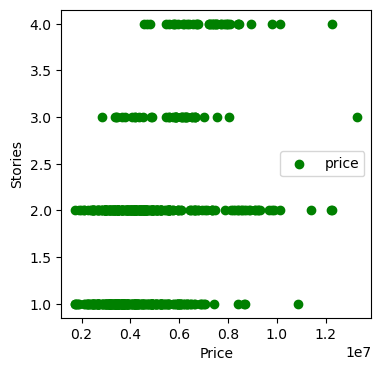

In [29]:
# Scatter plot:
plt.scatter(x='price',y='stories',label='price',color='g',data=df)

# Display the labels
plt.xlabel('Price')
plt.ylabel('Stories')

# displays the heading
plt.legend()

# displays the plot
plt.show()

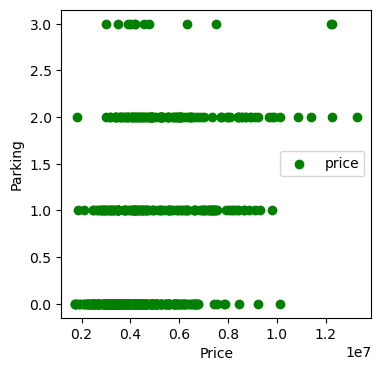

In [30]:
# scatter plot:
plt.scatter(x='price',y='parking',label='price',color='g',data=df)

# display the labels
plt.xlabel('Price')
plt.ylabel('Parking')

# displays the heading
plt.legend()

# display the plot
plt.show()

**Interpretation :** Price and parking has no correlation

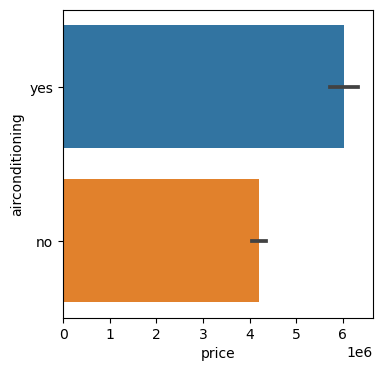

In [31]:
# Barplot:
sns.barplot(x='price',y='airconditioning',data=df)

# Display the plot
plt.show()

**Interpretation :** The price of the house is related to the facilities of air conditioning

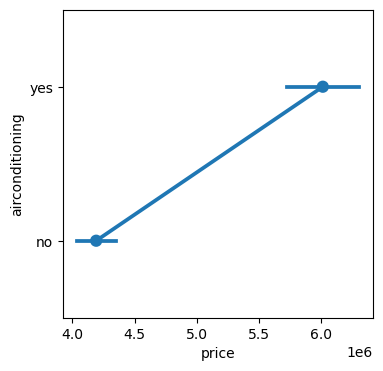

In [32]:
# Point plot
sns.pointplot(x='price',y='airconditioning',data=df)

# Display the plot
plt.show()

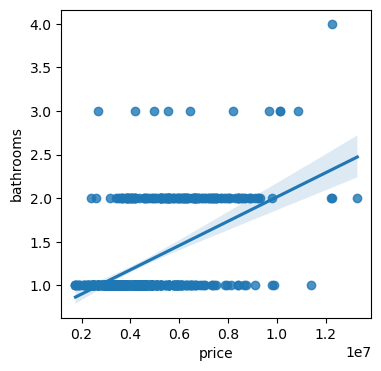

In [33]:
# regression plot:
sns.regplot(x='price',y='bathrooms',data=df)

# display the plot
plt.show()

**Interpretation :** There is a positive correlation between price and number of bathrooms

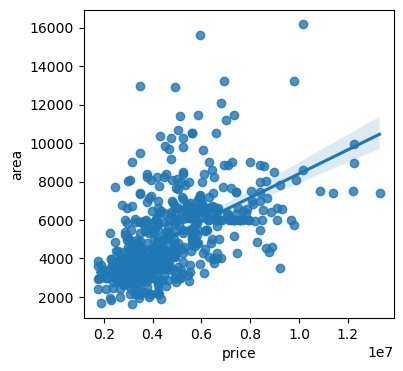

In [34]:
# Regression plot for price and area
sns.regplot(x='price',y='area',data=df)

# displays the plot
plt.show()

**Interpretation :** There is a high positive correlation between price and area

In [35]:
# Numerical columns
df_numerical = df.describe(include = [np.number])

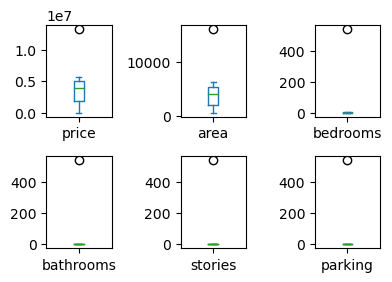

In [36]:
# Grounded box plot
df_numerical.plot(kind = 'box',subplots = True,layout = (3,3))

# to give the secified padding from the subplot:
plt.tight_layout()

# displays the plot:
plt.show()

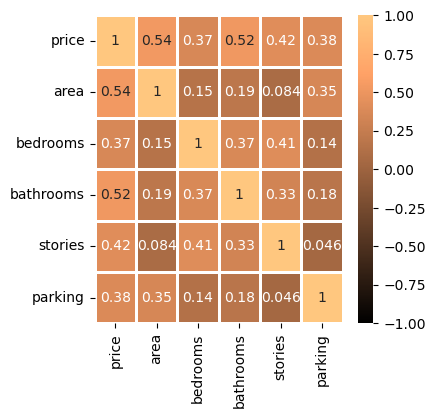

In [37]:
# cbar -cbar return the bar beside the heatmap
# cmap - assign the color to each shell
# Linewidth - gives space between each shell


sns.heatmap(data=df.corr(),annot=True,linewidths=1,
           cmap='copper',cbar=True,vmin=-1,vmax=1)

# display the plot:
plt.show()


**Interpretation :** Heatmap shows the variables having different distribution as compared with multiple variables respectively.

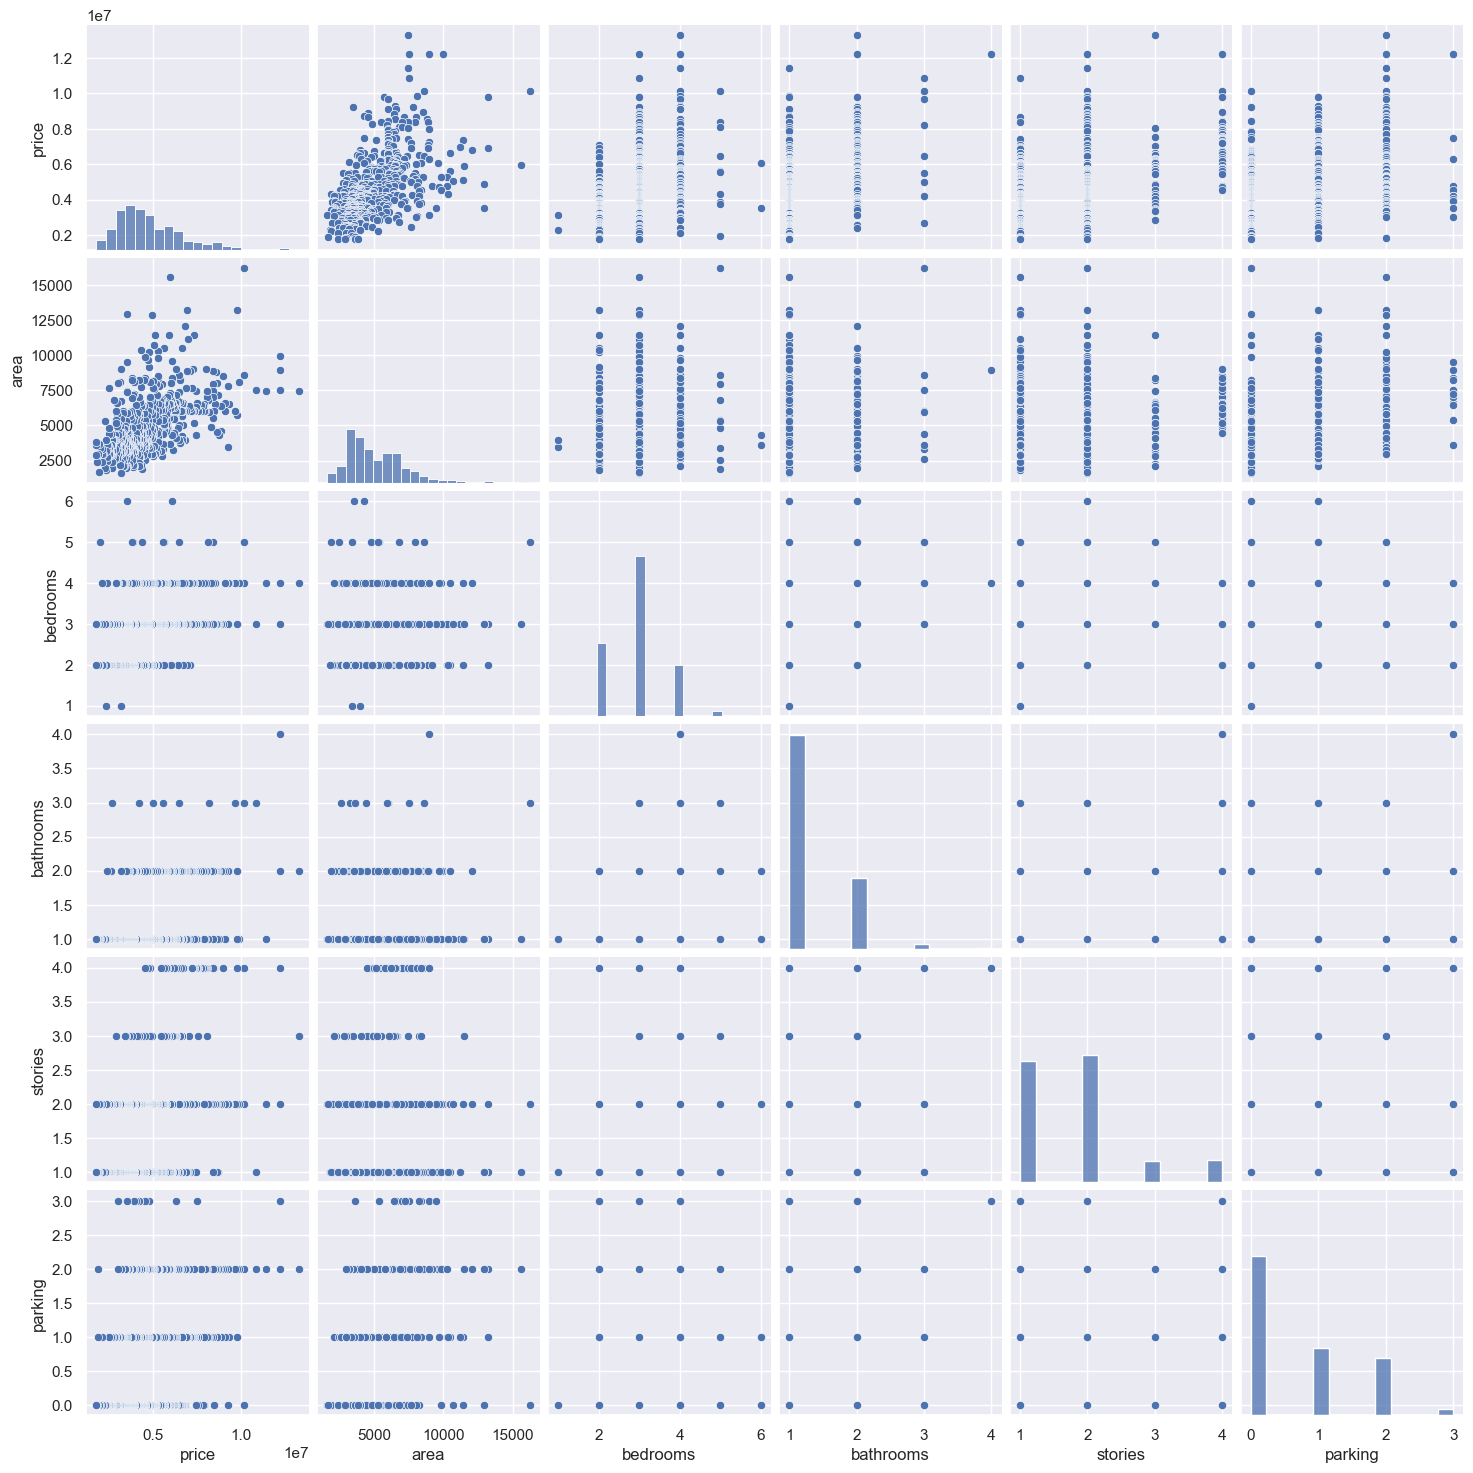

In [39]:
# Pair plot:
sns.set(style = 'darkgrid')
sns.pairplot(df)


In [38]:
# Considering only numerical columns
df_num = df.select_dtypes(include = [np.number])
df_num.head(2)


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3


In [39]:
# Displaying all numerical columns
df_num.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

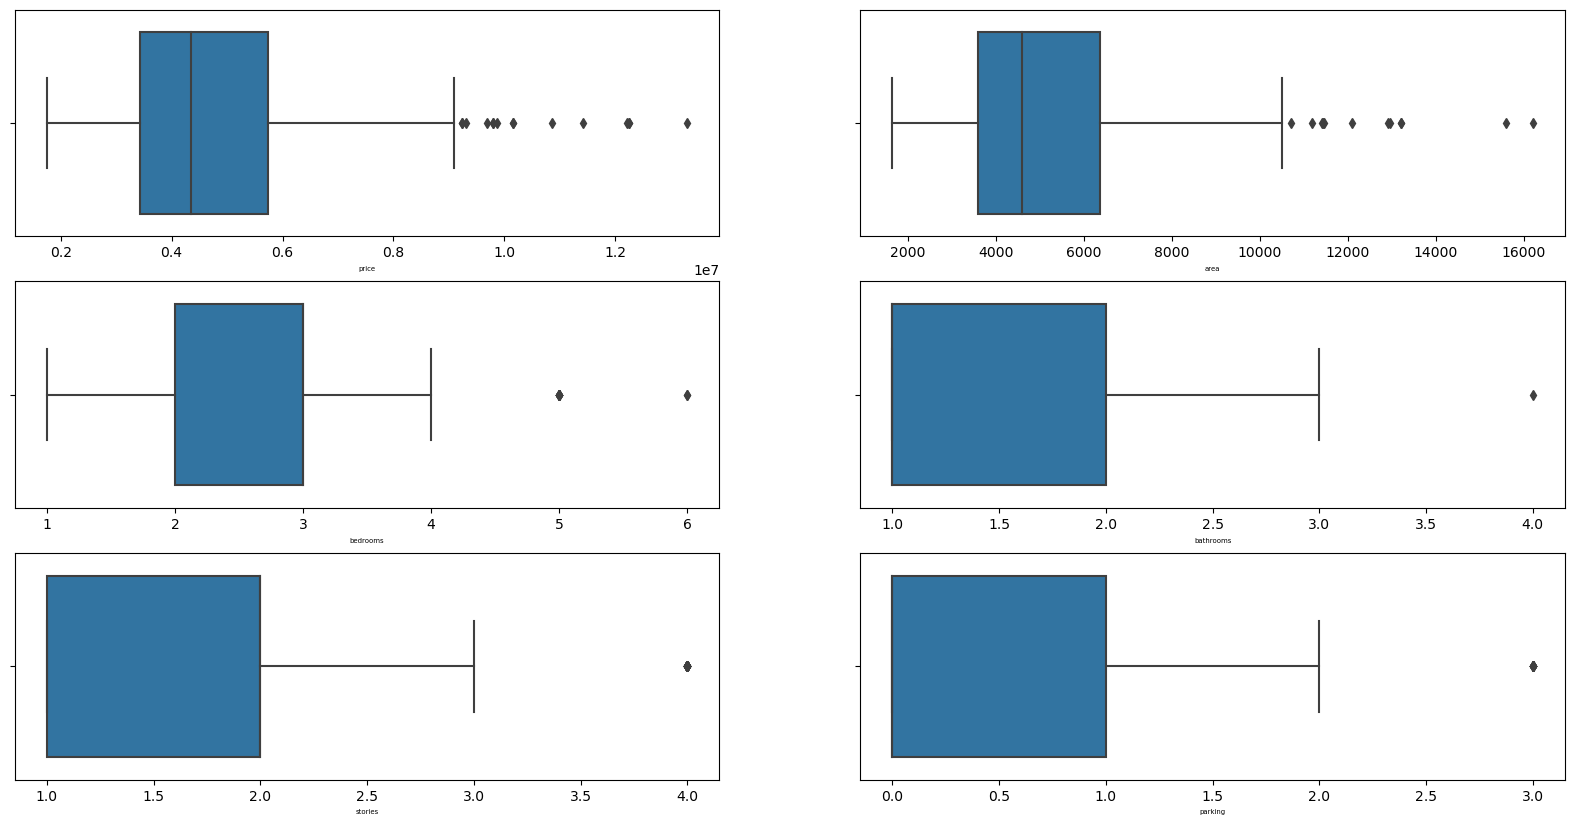

In [40]:
# Setting the figure size
fig,ax = plt.subplots(3,2,figsize =(20,10))

# Setting the figure size

for variable, subplot in zip(df_num.columns,ax.flatten()):
    z=sns.boxplot(x=df_num[variable],orient='h',whis=1.5,ax=subplot)
    z.set_xlabel(variable,fontsize = 5)
    

In [41]:
# 1st Quantile of the data
Q1 = df_num.quantile(0.25)

# 3rd Quantile of the data
Q3 = df_num.quantile(0.75)

# Obtaining the Inter Quantile Range
IQR = Q3-Q1

IQR

price        2310000.0
area            2760.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
parking            1.0
dtype: float64

In [42]:
# Removing the outliers 
df =df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis =1)]

In [43]:
# Shape of the dataset after removing the outliers
df.shape

(463, 13)

In [44]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished


In [45]:
df['furnishingstatus'].value_counts()

semi-furnished    198
unfurnished       159
furnished         106
Name: furnishingstatus, dtype: int64

### Encoding 

- Convert the categorical data into numerical data

In [46]:
# drop_first = 'True' creates (n-1) dummy variables from categories
data = pd.get_dummies(df,columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning',
                             'prefarea','furnishingstatus'],
              drop_first= True)
data


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,1
18,8890000,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,1,0,0,0,1,1,1,0
20,8750000,4320,3,1,2,2,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [47]:
data.shape

(463, 14)

### Scaling

In [48]:
# from sklearn library import standard scaler
from sklearn.preprocessing import StandardScaler

# minimum and maximum values of 'price'
print('Minimum value before transformation : ',data.price.min(),'\n'
     'Maximum value before transformation : ',data.price.max(),'\n')

# Instantinate the Standardscaler
standard_scale =StandardScaler()

# fit the standardscaler:
# fit_transform(): returns a transformed data
data['Scaled_Price']=standard_scale.fit_transform(data[['price']])


print('Minimum value after transformation : ',data.price.min(),'\n'
     'Maximum value after transformation : ',data.price.max(),'\n')

Minimum value before transformation :  1750000 
Maximum value before transformation :  9100000 

Minimum value after transformation :  1750000 
Maximum value after transformation :  9100000 



### Data Transformation

- Used to reduce the Skewness

Skewness : 0.8602260517068516


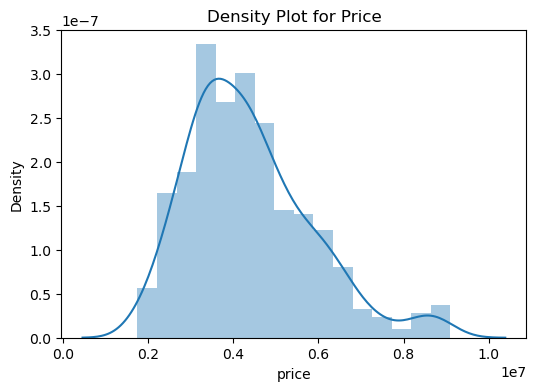

In [49]:
# setting figure size
plt.rcParams['figure.figsize']=[6,4]

# distribution of price
sns.distplot(data['price'])

# displays the title for the plot
plt.title('Density Plot for Price')

plt.ylabel('Density')

# coefficient of Skewness
print('Skewness :',data['price'].skew())

# display the plot:
plt.show()


Skewness : -0.022371324614264804


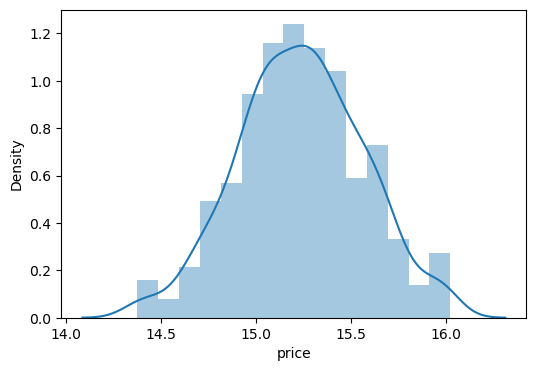

In [50]:
# Apply natural log transformation with (base 'e')
log_Price = np.log(data['price'])

# coefficient of Skewness
print('Skewness :',log_Price.skew())

# distribution of log_transformed variable:
sns.distplot(log_Price)

# set label for y-axis:
plt.ylabel('Density')

# display the plot:
plt.show()

In [51]:
# Import the sklearn library:
import sklearn

# import the train_test_split module from sklearn:
from sklearn.model_selection import train_test_split

In [52]:
# select the target column:
Y =data['price']

# select the Independent column
# By dropping the Target column
X =data.drop(['price'], axis=1)


In [53]:
# Let us now split the dataset into test and train
# Test Size : The proportion of the data to be included in the testing set 
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25,
                                                random_state = 100)

print('X_train :',x_train.shape)
print('X_test :',x_test.shape)
print('Y_train :',y_train.shape)
print('Y_test :',y_test.shape)

X_train : (347, 14)
X_test : (116, 14)
Y_train : (347,)
Y_test : (116,)


In [54]:
# Change to the DataFrame variable:

Price = pd.DataFrame(data['price'])
Area = pd.DataFrame(data['area'])


**Interpretation :** Select the variables for which we have to linear regression to predict values

In [55]:
Price

,price
15,9100000
16,9100000
18,8890000
19,8855000
20,8750000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [56]:
# Import LinearRegression
import sklearn
from sklearn.linear_model import LinearRegression


In [57]:
# Making Instances
lm=LinearRegression()
model=lm.fit(Price,Area)


In [58]:
model.coef_

array([[0.00062076]])

In [59]:
model.intercept_

array([2051.5309397])

In [60]:
model.score(Price,Area)

0.2566397926710007

In [61]:
# Model training
model.fit(x_train,y_train)

LinearRegression()

In [62]:
# Import r2_square and MSE
from sklearn.metrics import r2_score,mean_squared_error

In [63]:
y_pred = model.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error: {MSE:.2f}")
print(f" Root Mean Squared Error: {RMSE:.2f}")
print(f"R-Squared : {R2:.2f}")

Mean Squared Error: 0.00
 Root Mean Squared Error: 0.00
R-Squared : 1.00


In [64]:
# print metric to get performance:
print('Accuracy: ', model.score(x_test,y_test)*100)

Accuracy:  100.0


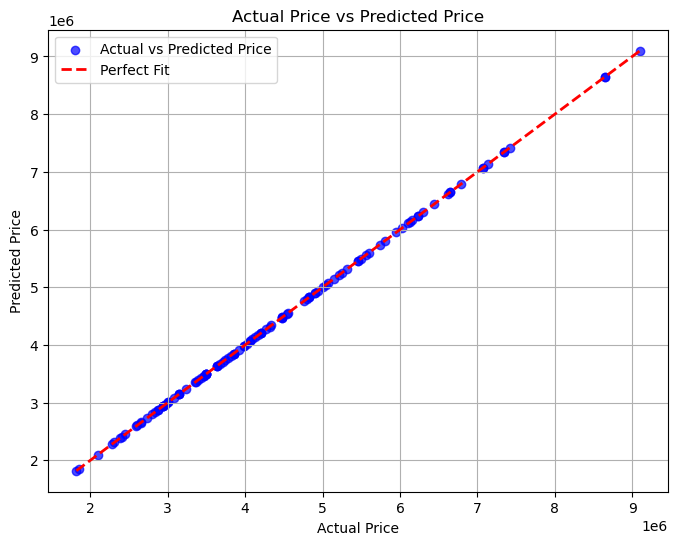

In [66]:
# Visualize the model's predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred, c='blue',marker = 'o', alpha=0.7, label='Actual vs Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle ='--',color='red',linewidth=2,label='Perfect Fit')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Actual Price vs Predicted Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Summary

**Data Preprocessing :**
- The initial step involved cleaning and preprocessing the data.This included handling missing values,removing outliers,and encoding categorical variables.
- Standardization or Normalization was applied to ensure uniformity in feature scales.


**Exploratory Data Analysis (EDA):**
- EDA provided insights into the distribution of key variables and their relationships.
- Scatter plots,correlation matrices,and histograms aided in understanding the dataset's characteristics.


**Model Development :**
- Linear Regression was chosen as the predictive model due to its simplicity and interpretability.
- The dataset was split into training and testing sets for model training and evaluation.Feature selection techniques were applied to identify the most influential variables.


**Model Training and Evaluation :**
- The Linear regression model was trained on the training set and evaluated on the test set.Performance metrics such as Mean Squared Error (MSE) and R-squared were utilized to access the model's accuracy and goodness of fit.

**Results :**
- The trained model demonstrated a commendable ability to predict housing prices based on the selected features.Noteworthy predictors included area,number of bedrooms and location.The model's R-Squared value indicated a strong explanatory power,while MSE provided insights into prediction accuracy.

**Conclusion :**
- In conclusion, the linear regression analysis successfully established a predictive model for housing prices.The insights gained contribute to a foundational understanding,paving the way for further refinement and exploration in the realm of housing price prediction.
- Future work could involve exploring more advanced regression techniques, incorporating additional features, and finetuning the model for enhanced performance.